In [5]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Bez dropout

In [19]:
from keras import models, layers


data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2, seed=42, interpolation='nearest'),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2, seed=42),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2, seed=42),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

train_dir = r'/home/plorenc/Desktop/AiR_ISS/ML/datasets/dataset_cats_dogs'

train_dataset = image_dataset_from_directory(
    train_dir,  # Ścieżka do folderu
    labels="inferred", 
    label_mode="binary",  # Zastosowanie binarnej klasyfikacji
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),  # Zmiana rozmiaru obrazków na 150x150
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="training",  # Zbiór treningowy
    seed=42
)

validation_dataset = image_dataset_from_directory(
    train_dir,  # Ścieżka do folderu
    labels="inferred", 
    label_mode="binary",  # Zastosowanie binarnej klasyfikacji
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),  # Zmiana rozmiaru obrazków na 150x150
    shuffle=True,
    validation_split=0.2,  # 20% danych przeznaczymy na walidację
    subset="validation",  # Zbiór walidacyjny
    seed=42
)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [21]:
len(validation_dataset), len(train_dataset)


(25, 100)

In [22]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitorujemy utratę na zbiorze walidacyjnym
    patience=5,            # Jeśli po 5 epokach brak poprawy, zatrzymujemy trening
    restore_best_weights=True  # Przywracamy najlepsze wagi po zatrzymaniu
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    batch_size=20,
    callbacks=[early_stopping]
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 470ms/step - accuracy: 0.5285 - loss: 0.7309 - val_accuracy: 0.5562 - val_loss: 0.6784
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.5860 - loss: 0.6806 - val_accuracy: 0.5512 - val_loss: 0.7759
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 502ms/step - accuracy: 0.5870 - loss: 0.6710 - val_accuracy: 0.5838 - val_loss: 0.6703
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 522ms/step - accuracy: 0.6311 - loss: 0.6440 - val_accuracy: 0.6037 - val_loss: 0.6773
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 510ms/step - accuracy: 0.6475 - loss: 0.6317 - val_accuracy: 0.6475 - val_loss: 0.6466
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 499ms/step - accuracy: 0.6485 - loss: 0.6167 - val_accuracy: 0.6125 - val_loss: 0.6811
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 517ms/step - accuracy: 0.6513 - loss: 0.6158 - val_accuracy: 0.6500 - val_loss: 0.6180
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 511ms/step - accuracy: 0.6790 - loss: 0

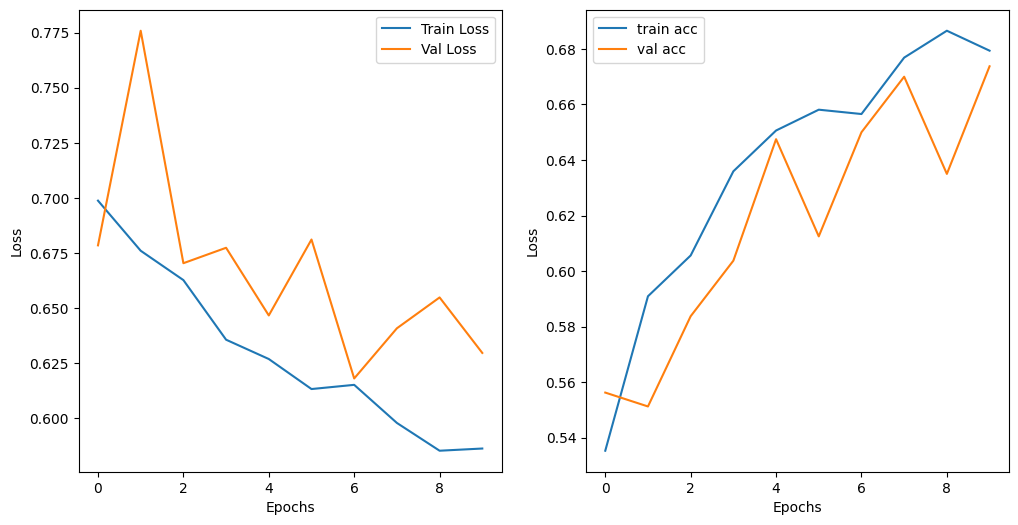

In [23]:
history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

### Model z dropoutem bez agumentacji

In [25]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2, seed=42, interpolation='nearest'),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2, seed=42),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2, seed=42),
])

model = models.Sequential([
    #data_augmentation,
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/home/plorenc/Desktop/AiR_ISS/OpenCL/lab3/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    batch_size=20,
    callbacks=[early_stopping]
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 475ms/step - accuracy: 0.4909 - loss: 0.9714 - val_accuracy: 0.4837 - val_loss: 0.6932
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 486ms/step - accuracy: 0.4899 - loss: 0.6933 - val_accuracy: 0.4825 - val_loss: 0.6941
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.5119 - loss: 0.6930 - val_accuracy: 0.5175 - val_loss: 0.6930
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 489ms/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.5175 - val_loss: 0.6931
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 495ms/step - accuracy: 0.5210 - loss: 0.6927 - val_accuracy: 0.5263 - val_loss: 0.6928
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 507ms/step - accuracy: 0.4953 - loss: 0.6931 - val_accuracy: 0.5375 - val_loss: 0.6886
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.5385 - loss: 0.6885 - val_accuracy: 0.5663 - val_loss: 0.6782
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 510ms/step - accuracy: 0.5671 - loss: 0

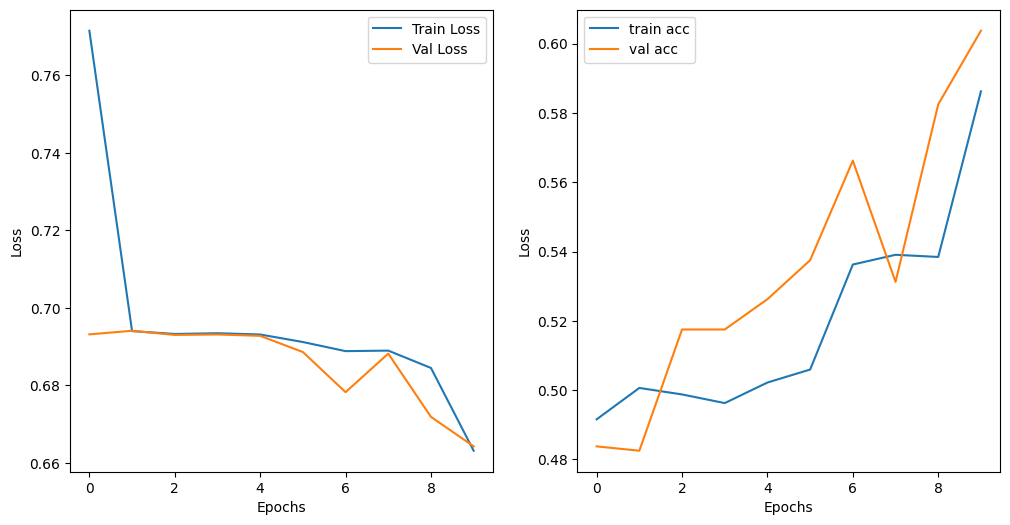

In [27]:
history_dict = history.history

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history_dict['loss'], label='Train Loss')
axs[0].plot(history_dict['val_loss'], label='Val Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(history_dict['accuracy'], label='train acc')
axs[1].plot(history_dict['val_accuracy'], label='val acc')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

### Inplentacja w torchu

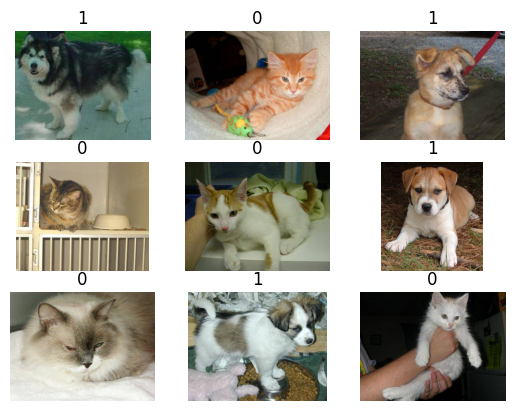

In [1]:
import torch
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2


cat_dataset = []
dog_dataset = []

dir = r"/home/plorenc/Desktop/AiR_ISS/ML/datasets"

for root, subfolders, files in os.walk(dir): 
    for file in files:
        file_path = os.path.join(root, file) 
        if "cat" in file.lower():
            cat_dataset.append((file_path, 0))
        elif "dog" in file.lower():
            dog_dataset.append((file_path, 1)) 


combined = cat_dataset + dog_dataset
random.shuffle(combined)

train_dir, test_dir = train_test_split(combined, test_size=0.2, random_state=42)
test_dir, val_dir = train_test_split(test_dir, test_size=0.2, random_state=42)

fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i in range(3*3):
    random_dir = train_dir[random.randint(0, len(train_dir))]
    image = cv2.imread(random_dir[0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].set_axis_off()
    axes[i].set_title(random_dir[1]) 

In [2]:
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
import torch
import cv2

# Transformacje
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(degrees=18),  # 0.2*90 = 18 stopni
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Dataset
class CatDogDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        image_path, label = self.dataset[index]
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Wczytanie obrazu
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konwersja BGR -> RGB
        
        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(label, dtype=torch.float32)

# Dane
train_data = CatDogDataset(train_dir, transform=transform)
test_data = CatDogDataset(test_dir)
val_data = CatDogDataset(val_dir)

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class VGG(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()
        
        self.conv_layers = nn.Sequential(
            # Blok 1
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),

            # Blok 2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),

            # Blok 3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2)
        )
        
        # Ustalanie rozmiaru wejściowego warstwy liniowej
        self.fc_input_size = 128 * 28 * 28  # Rozmiar zależny od rozmiaru obrazu

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.fc_input_size, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)

        x = torch.sigmoid(x)
        return x

model = VGG(in_channels=3, num_classes=1).to(device)

In [10]:
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

EPOCHS = 10

import torch
import torch.nn as nn
from torch import optim

def train(model, train_loader, loss_fn, optimizer, device):
    model.train()  # Ustawienie modelu w tryb treningowy
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    return avg_loss


def validate(model, val_loader, loss_fn, device):
    model.eval() 
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad(): 
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            running_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float() 
            correct += (predicted == labels).sum().item()  
            total += labels.size(0) 

    avg_loss = running_loss / len(val_loader)
    accuracy = 100 * correct / total 
    return avg_loss, accuracy


In [ ]:
from tqdm.auto import tqdm

EPOCHS = 30



for epoch in tqdm(range(EPOCHS)):
    # Trening
    train_loss = train(model, train_dataloader, loss_fn, optimizer, device)
    
    # Walidacja
    val_loss, val_accuracy = validate(model, val_dataloader, loss_fn, device)
    
    # Drukowanie wyników
    print(f"Epoch [{epoch+1}/{EPOCHS}] Training Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f} Validation Accuracy: {val_accuracy:.2f}%")

  3%|▎         | 1/30 [00:15<07:31, 15.57s/it]

Epoch [1/30] Training Loss: 0.6313 Validation Loss: 0.6125 Validation Accuracy: 61.25%


  7%|▋         | 2/30 [00:30<07:13, 15.47s/it]

Epoch [2/30] Training Loss: 0.6057 Validation Loss: 0.5866 Validation Accuracy: 69.38%


 10%|█         | 3/30 [00:47<07:07, 15.82s/it]

Epoch [3/30] Training Loss: 0.6003 Validation Loss: 0.5765 Validation Accuracy: 70.00%


 13%|█▎        | 4/30 [01:03<06:55, 15.99s/it]

Epoch [4/30] Training Loss: 0.5894 Validation Loss: 0.5715 Validation Accuracy: 68.12%


 17%|█▋        | 5/30 [01:19<06:43, 16.12s/it]

Epoch [5/30] Training Loss: 0.5779 Validation Loss: 0.6251 Validation Accuracy: 64.38%


 20%|██        | 6/30 [01:36<06:28, 16.19s/it]

Epoch [6/30] Training Loss: 0.5671 Validation Loss: 0.5735 Validation Accuracy: 68.75%


 23%|██▎       | 7/30 [01:52<06:13, 16.23s/it]

Epoch [7/30] Training Loss: 0.5564 Validation Loss: 0.5518 Validation Accuracy: 67.50%


 27%|██▋       | 8/30 [02:08<05:56, 16.22s/it]

Epoch [8/30] Training Loss: 0.5510 Validation Loss: 0.5333 Validation Accuracy: 70.00%


 30%|███       | 9/30 [02:24<05:40, 16.23s/it]

Epoch [9/30] Training Loss: 0.5342 Validation Loss: 0.5295 Validation Accuracy: 73.75%


 33%|███▎      | 10/30 [02:41<05:24, 16.25s/it]

Epoch [10/30] Training Loss: 0.5413 Validation Loss: 0.5476 Validation Accuracy: 68.12%


 37%|███▋      | 11/30 [02:57<05:09, 16.30s/it]

Epoch [11/30] Training Loss: 0.5221 Validation Loss: 0.5690 Validation Accuracy: 68.75%


 40%|████      | 12/30 [03:16<05:05, 16.97s/it]

Epoch [12/30] Training Loss: 0.5252 Validation Loss: 0.5783 Validation Accuracy: 72.50%


 43%|████▎     | 13/30 [03:34<04:54, 17.33s/it]

Epoch [13/30] Training Loss: 0.5162 Validation Loss: 0.5140 Validation Accuracy: 72.50%


 47%|████▋     | 14/30 [03:51<04:38, 17.40s/it]

Epoch [14/30] Training Loss: 0.5150 Validation Loss: 0.5094 Validation Accuracy: 75.00%


 50%|█████     | 15/30 [04:09<04:22, 17.53s/it]

Epoch [15/30] Training Loss: 0.4886 Validation Loss: 0.4538 Validation Accuracy: 76.88%


 53%|█████▎    | 16/30 [04:27<04:06, 17.59s/it]

Epoch [16/30] Training Loss: 0.4881 Validation Loss: 0.5962 Validation Accuracy: 71.88%


 57%|█████▋    | 17/30 [04:45<03:50, 17.73s/it]

Epoch [17/30] Training Loss: 0.4941 Validation Loss: 0.4932 Validation Accuracy: 77.50%


 60%|██████    | 18/30 [05:03<03:33, 17.78s/it]

Epoch [18/30] Training Loss: 0.4840 Validation Loss: 0.6023 Validation Accuracy: 69.38%


 63%|██████▎   | 19/30 [05:21<03:17, 17.93s/it]

Epoch [19/30] Training Loss: 0.4712 Validation Loss: 0.5015 Validation Accuracy: 76.88%


 67%|██████▋   | 20/30 [05:39<02:58, 17.82s/it]

Epoch [20/30] Training Loss: 0.4757 Validation Loss: 0.5004 Validation Accuracy: 75.00%


 70%|███████   | 21/30 [05:56<02:39, 17.77s/it]

Epoch [21/30] Training Loss: 0.4610 Validation Loss: 0.4546 Validation Accuracy: 80.00%


 73%|███████▎  | 22/30 [06:15<02:24, 18.11s/it]

Epoch [22/30] Training Loss: 0.4699 Validation Loss: 0.5202 Validation Accuracy: 70.00%


 77%|███████▋  | 23/30 [06:34<02:08, 18.37s/it]

Epoch [23/30] Training Loss: 0.4672 Validation Loss: 0.4731 Validation Accuracy: 78.75%


 80%|████████  | 24/30 [06:53<01:50, 18.44s/it]

Epoch [24/30] Training Loss: 0.4533 Validation Loss: 0.5290 Validation Accuracy: 71.88%


 83%|████████▎ | 25/30 [07:11<01:32, 18.45s/it]

Epoch [25/30] Training Loss: 0.4401 Validation Loss: 0.5351 Validation Accuracy: 70.00%


 87%|████████▋ | 26/30 [07:29<01:13, 18.33s/it]

Epoch [26/30] Training Loss: 0.4521 Validation Loss: 0.4820 Validation Accuracy: 78.12%


 90%|█████████ | 27/30 [07:48<00:54, 18.33s/it]

Epoch [27/30] Training Loss: 0.4325 Validation Loss: 0.4634 Validation Accuracy: 78.75%


 93%|█████████▎| 28/30 [08:06<00:36, 18.42s/it]

Epoch [28/30] Training Loss: 0.4399 Validation Loss: 0.5188 Validation Accuracy: 75.62%


 97%|█████████▋| 29/30 [08:24<00:18, 18.09s/it]

Epoch [29/30] Training Loss: 0.4418 Validation Loss: 0.4548 Validation Accuracy: 77.50%


100%|██████████| 30/30 [08:41<00:00, 17.38s/it]

Epoch [30/30] Training Loss: 0.4230 Validation Loss: 0.4709 Validation Accuracy: 76.25%


In [11]:
from transformers import ViTForImageClassification, ViTImageProcessor
from transformers import ViTConfig, ViTModel

config = ViTConfig.from_pretrained("google/vit-base-patch16-224")

config.num_labels = 1

model = ViTForImageClassification(config).to(device)

In [12]:
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

class CatDogDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        image_path, label = self.dataset[index]
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Wczytanie obrazu
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konwersja BGR -> RGB
        
        if self.transform:
            img = self.transform(img, return_tensors='pt').pixel_values

        return img, torch.tensor(label, dtype=torch.float32)

train_data = CatDogDataset(train_dir, transform=processor)
test_data = CatDogDataset(test_dir, transform=processor)
val_data = CatDogDataset(val_dir, transform=processor)

BATCH_SIZE = 16

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
next(iter(train_dataloader))

[tensor([[[[[-0.5137, -0.5059, -0.4980,  ..., -0.2863, -0.3176, -0.3569],
            [-0.5059, -0.4980, -0.4902,  ..., -0.2863, -0.3098, -0.3412],
            [-0.4980, -0.4902, -0.4902,  ..., -0.2784, -0.2941, -0.3176],
            ...,
            [-0.3490, -0.3020, -0.2706,  ..., -0.2941, -0.3020, -0.4275],
            [-0.3176, -0.2941, -0.3098,  ...,  0.0510, -0.0039, -0.2157],
            [-0.3176, -0.3176, -0.3333,  ...,  0.1529,  0.1686,  0.1529]],
 
           [[-0.4980, -0.4902, -0.4824,  ..., -0.2706, -0.2627, -0.2471],
            [-0.4902, -0.4824, -0.4745,  ..., -0.2706, -0.2706, -0.2549],
            [-0.4824, -0.4745, -0.4745,  ..., -0.2627, -0.2627, -0.2627],
            ...,
            [-0.5451, -0.5059, -0.4902,  ..., -0.2314, -0.2627, -0.4039],
            [-0.5137, -0.4980, -0.5294,  ...,  0.1137,  0.0510, -0.1608],
            [-0.5137, -0.5216, -0.5529,  ...,  0.2157,  0.2392,  0.2471]],
 
           [[-0.5059, -0.4980, -0.4902,  ..., -0.2784, -0.2784, -0.2863]

In [18]:
from tqdm.auto import tqdm

EPOCHS = 30

optimizer = optim.Adam(model.parameters())
loss_fn = nn.BCEWithLogitsLoss() 

for epoch in tqdm(range(EPOCHS)):
    model.train()
    running_loss = 0.0

    for batch in train_dataloader:
        optimizer.zero_grad()
        images, labels = batch
        images = images.to(device)
        labels = labels.float().to(device)
        images = images.squeeze(1)

        logits = model(images).logits
        loss = loss_fn(logits.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)

    # Walidacja
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_dataloader:
            images, labels = batch
            images = images.to(device)
            labels = labels.float().to(device)
            images = images.squeeze(1)

            logits = model(images).logits
            loss = loss_fn(logits.squeeze(), labels)
            val_loss += loss.item()

            preds = (torch.sigmoid(logits.squeeze()) > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_dataloader)
    val_acc = 100 * correct / total

    print(f"Epoch [{epoch+1}/{EPOCHS}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")


  3%|▎         | 1/30 [02:15<1:05:38, 135.79s/it]

Epoch [1/30] | Train Loss: 0.6982 | Val Loss: 0.6992 | Val Acc: 46.88%


  7%|▋         | 2/30 [04:31<1:03:23, 135.85s/it]

Epoch [2/30] | Train Loss: 0.6959 | Val Loss: 0.6982 | Val Acc: 46.88%


 10%|█         | 3/30 [06:48<1:01:13, 136.07s/it]

Epoch [3/30] | Train Loss: 0.6957 | Val Loss: 0.6914 | Val Acc: 53.12%


 13%|█▎        | 4/30 [09:04<59:01, 136.23s/it]  

Epoch [4/30] | Train Loss: 0.6948 | Val Loss: 0.6912 | Val Acc: 53.12%


 17%|█▋        | 5/30 [11:20<56:47, 136.31s/it]

Epoch [5/30] | Train Loss: 0.6946 | Val Loss: 0.6917 | Val Acc: 53.12%


 20%|██        | 6/30 [13:37<54:35, 136.48s/it]

Epoch [6/30] | Train Loss: 0.6938 | Val Loss: 0.6947 | Val Acc: 46.88%


 23%|██▎       | 7/30 [15:51<51:58, 135.57s/it]

Epoch [7/30] | Train Loss: 0.6942 | Val Loss: 0.6931 | Val Acc: 53.75%


 27%|██▋       | 8/30 [18:04<49:27, 134.87s/it]

Epoch [8/30] | Train Loss: 0.6973 | Val Loss: 0.6913 | Val Acc: 53.12%


 30%|███       | 9/30 [20:18<47:01, 134.36s/it]

Epoch [9/30] | Train Loss: 0.6955 | Val Loss: 0.6937 | Val Acc: 46.88%


 33%|███▎      | 10/30 [22:31<44:39, 133.97s/it]

Epoch [10/30] | Train Loss: 0.6949 | Val Loss: 0.6919 | Val Acc: 53.12%


 37%|███▋      | 11/30 [24:43<42:18, 133.60s/it]

Epoch [11/30] | Train Loss: 0.6934 | Val Loss: 0.6943 | Val Acc: 46.88%


 40%|████      | 12/30 [26:56<39:59, 133.29s/it]

Epoch [12/30] | Train Loss: 0.6934 | Val Loss: 0.6937 | Val Acc: 46.88%


 43%|████▎     | 13/30 [29:09<37:44, 133.19s/it]

Epoch [13/30] | Train Loss: 0.6939 | Val Loss: 0.6934 | Val Acc: 46.88%


 47%|████▋     | 14/30 [31:22<35:30, 133.17s/it]

Epoch [14/30] | Train Loss: 0.6932 | Val Loss: 0.6936 | Val Acc: 46.88%


 50%|█████     | 15/30 [33:35<33:16, 133.13s/it]

Epoch [15/30] | Train Loss: 0.6933 | Val Loss: 0.6935 | Val Acc: 46.88%


 53%|█████▎    | 16/30 [35:48<31:04, 133.16s/it]

Epoch [16/30] | Train Loss: 0.6933 | Val Loss: 0.6933 | Val Acc: 46.88%


 57%|█████▋    | 17/30 [38:00<28:44, 132.65s/it]

Epoch [17/30] | Train Loss: 0.6933 | Val Loss: 0.6933 | Val Acc: 46.88%


 60%|██████    | 18/30 [40:11<26:26, 132.22s/it]

Epoch [18/30] | Train Loss: 0.6932 | Val Loss: 0.6931 | Val Acc: 53.12%


 63%|██████▎   | 19/30 [42:25<24:19, 132.66s/it]

Epoch [19/30] | Train Loss: 0.6933 | Val Loss: 0.6933 | Val Acc: 46.88%


 67%|██████▋   | 20/30 [44:41<22:16, 133.61s/it]

Epoch [20/30] | Train Loss: 0.6936 | Val Loss: 0.6950 | Val Acc: 46.88%


 70%|███████   | 21/30 [46:56<20:07, 134.22s/it]

Epoch [21/30] | Train Loss: 0.6930 | Val Loss: 0.6951 | Val Acc: 46.88%


 73%|███████▎  | 22/30 [49:10<17:51, 133.97s/it]

Epoch [22/30] | Train Loss: 0.6943 | Val Loss: 0.6930 | Val Acc: 53.12%


 73%|███████▎  | 22/30 [49:12<17:53, 134.18s/it]


KeyboardInterrupt: 